In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from scipy.stats import norm

def BlackScholesCall(S_0: float, K: float, r: float, sigma: float, T: float) -> float:
    d1 = (np.log(S_0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S_0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)


def BlackScholesFinalPrices(S_0: float, r: float, sigma: float, T: float, n: int, rng: np.random.Generator):
    """Generate n samples of the final stock price using the Black-Scholes model."""
    Z = rng.normal(loc=0, scale=1, size=n)
    final_prices = S_0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)
    return final_prices

S_0 = 100      # Initial stock price
T = 1.0        # Time to maturity (1 year)
n = 100_000    # Number of samples


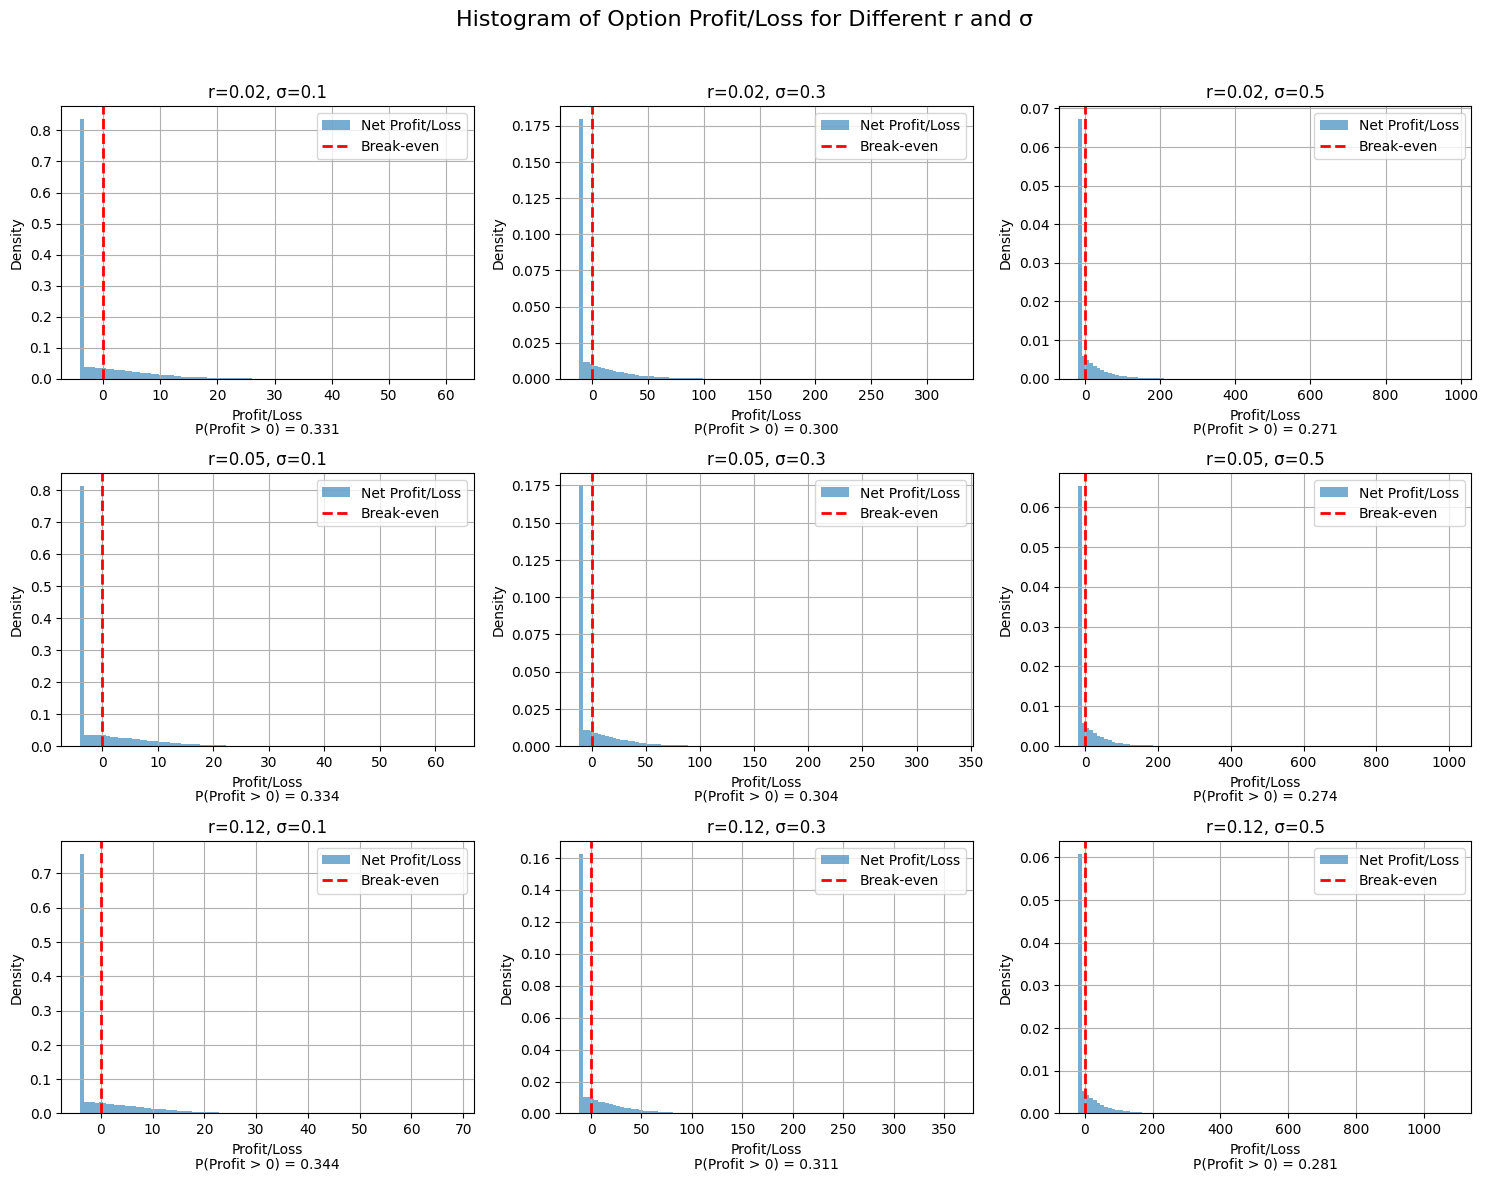

In [2]:
r_values = [0.02, 0.05, 0.12]
sigma_values = [0.1, 0.3, 0.5]

# Generate all combinations of (r, sigma)
combinations = list(itertools.product(r_values, sigma_values))

# Storage for results
profit_loss_dict = {}

# Iterate through r and sigma combinations
seed = 42
for r, sigma in combinations:
    rng = np.random.default_rng(seed)  # Reset RNG for consistency
    
    # Generate final stock prices
    prices_distribution = BlackScholesFinalPrices(S_0, r, sigma, T, n, rng)

    # Determine strike price K as the mean of final prices
    K = np.mean(prices_distribution)
    
    # Calculate Black-Scholes call option price
    option_price = BlackScholesCall(S_0, K, r, sigma, T)

    # Calculate option payout: max(S_T - K, 0)
    option_payouts = np.maximum(prices_distribution - K, 0)

    # Calculate net profit/loss: Payout - Option Price
    net_profit_loss = option_payouts - option_price

    # Store results
    profit_loss_dict[(r, sigma)] = net_profit_loss

# Plot histograms for net profit/loss
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle("Histogram of Option Profit/Loss for Different r and σ", fontsize=16)

# Iterate through combinations and plot
for ax, ((r, sigma), profit_loss) in zip(axes.flat, profit_loss_dict.items()):
    # Compute probability of being profitable
    prob_profit = np.mean(profit_loss > 0)
    
    # Plot histogram
    ax.hist(profit_loss, bins=100, density=True, alpha=0.6, label="Net Profit/Loss")
    
    # Titles and labels
    ax.set_title(f"r={r}, σ={sigma}")
    ax.set_xlabel("Profit/Loss")
    ax.set_ylabel("Density")
    ax.axvline(0, color='r', linestyle='dashed', linewidth=2, label="Break-even")
    
    # Annotate probability of profit below the x-axis label
    ax.annotate(f"P(Profit > 0) = {prob_profit:.3f}", xy=(0.5, -0.2), xycoords='axes fraction', 
                fontsize=10, ha='center', color="black")

    ax.legend()
    ax.grid(True)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

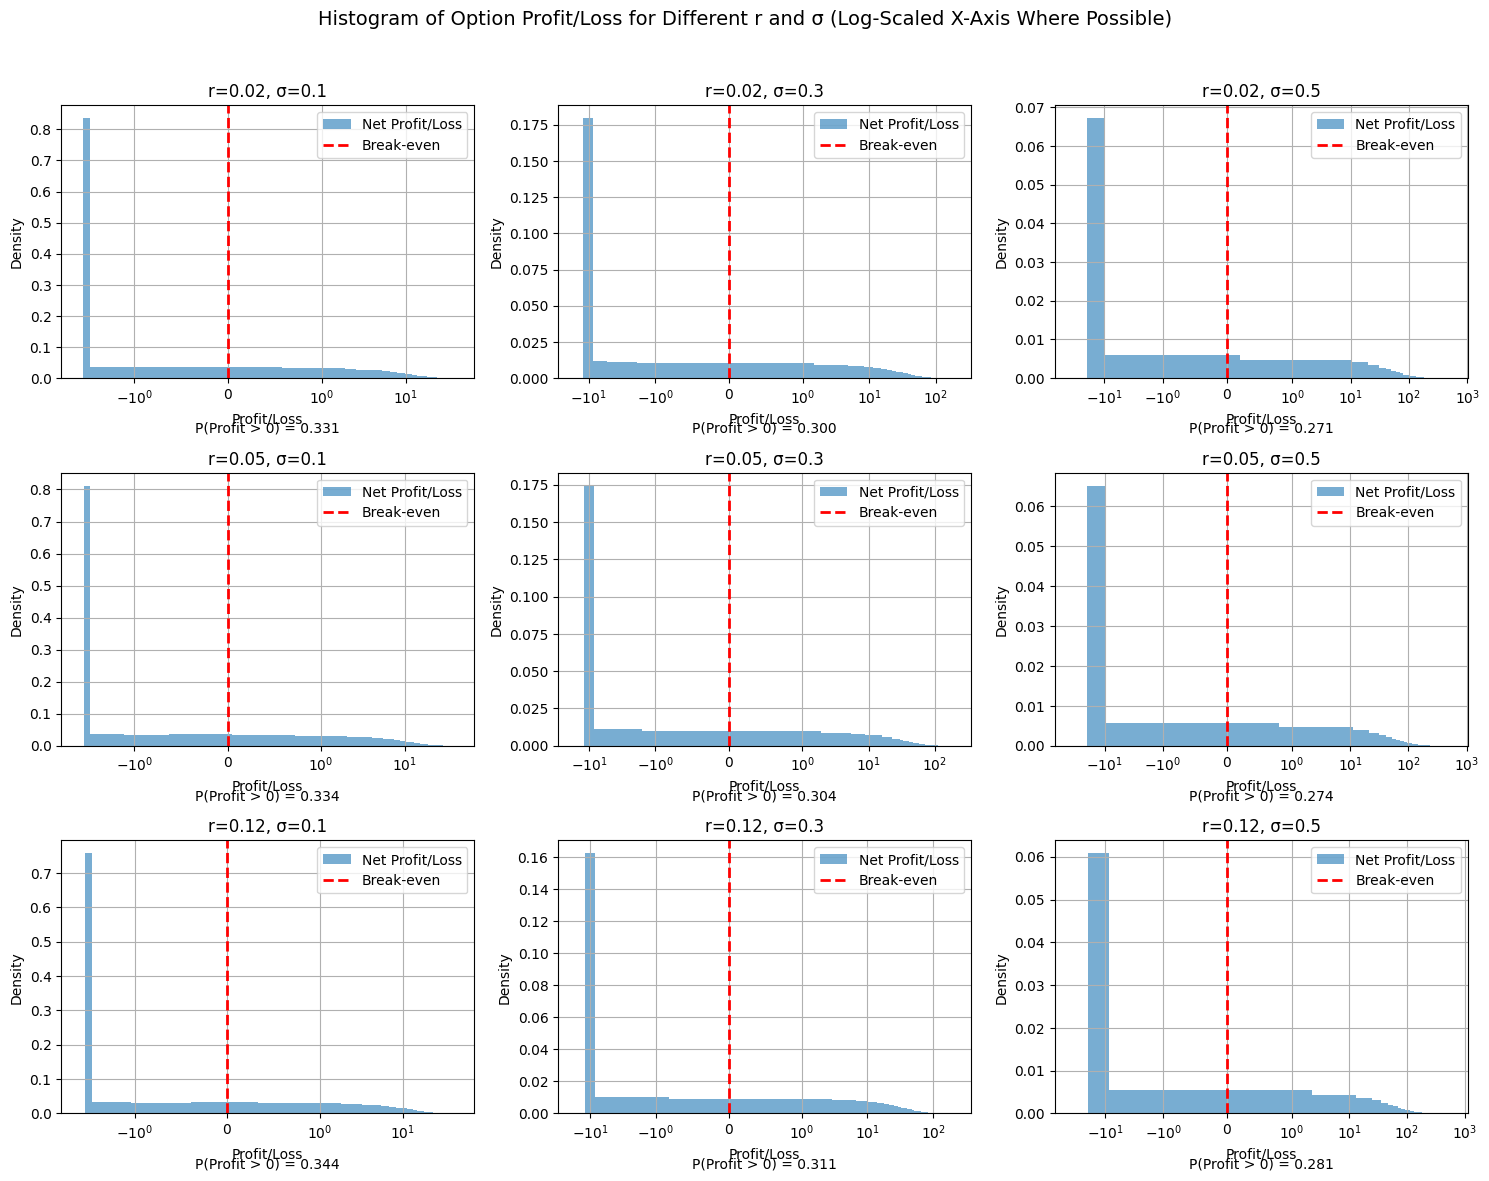

In [3]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle("Histogram of Option Profit/Loss for Different r and σ (Log-Scaled X-Axis Where Possible)", fontsize=14)

# Iterate through combinations and plot
for ax, ((r, sigma), profit_loss) in zip(axes.flat, profit_loss_dict.items()):
    # Compute probability of being profitable
    prob_profit = np.mean(profit_loss > 0)
    
    # Plot histogram
    ax.hist(profit_loss, bins=100, density=True, alpha=0.6, label="Net Profit/Loss")
    
    # Titles and labels
    ax.set_title(f"r={r}, σ={sigma}")
    ax.set_xlabel("Profit/Loss")
    ax.set_ylabel("Density")
    ax.axvline(0, color='r', linestyle='dashed', linewidth=2, label="Break-even")

    # Annotate probability of profit below the x-axis label
    ax.annotate(f"P(Profit > 0) = {prob_profit:.3f}", xy=(0.5, -0.2), xycoords='axes fraction', 
                fontsize=10, ha='center', color="black")

    # Apply log scale only to the positive side of the x-axis
    positive_values = profit_loss[profit_loss > 0]
    if len(positive_values) > 0:
        ax.set_xscale("symlog", linthresh=1)  # Use symlog to handle negatives while log-scaling positives

    ax.legend()
    ax.grid(True, which="both")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()